In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
train = pd.read_csv('train_data.txt', sep=':::', engine='python', header=None, 
                    names=['id', 'title', 'genre', 'description'])


In [3]:
print("Train Data:")
print(train.head())

Train Data:
   id                               title       genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


In [4]:
test = pd.read_csv('test_data_solution.txt', sep=':::', engine='python', header=None, 
                   names=['id', 'title', 'genre', 'description'])

In [5]:
print("Test Data:")
print(test.head())

Test Data:
   id                          title          genre  \
0   1          Edgar's Lunch (1998)       thriller    
1   2      La guerra de papá (1977)         comedy    
2   3   Off the Beaten Track (2010)    documentary    
3   4        Meu Amigo Hindu (2015)          drama    
4   5             Er nu zhai (1955)          drama    

                                         description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  


In [6]:
print("\n Dataset Information:")
print(train.info())


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None


In [7]:
print(train.describe(include='all'))

                  id                           title    genre  \
count   54214.000000                           54214    54214   
unique           NaN                           54214       27   
top              NaN   Oscar et la dame rose (2009)    drama    
freq             NaN                               1    13613   
mean    27107.500000                             NaN      NaN   
std     15650.378084                             NaN      NaN   
min         1.000000                             NaN      NaN   
25%     13554.250000                             NaN      NaN   
50%     27107.500000                             NaN      NaN   
75%     40660.750000                             NaN      NaN   
max     54214.000000                             NaN      NaN   

                                              description  
count                                               54214  
unique                                              54086  
top      Grammy - music award of the Am

In [8]:
print(train.isnull().sum())

id             0
title          0
genre          0
description    0
dtype: int64


In [9]:
print("\n Dataset Information:")
print(test.info())


 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   title        54200 non-null  object
 2   genre        54200 non-null  object
 3   description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None


In [10]:
print(test.isnull().sum())

id             0
title          0
genre          0
description    0
dtype: int64


In [11]:
le = LabelEncoder()
train['genre_encoded'] = le.fit_transform(train['genre'])
test['genre_encoded'] = le.transform(test['genre'])

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train['clean_description'] = train['description'].apply(clean_text)
test['clean_description'] = test['description'].apply(clean_text)

In [13]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_vec = vectorizer.fit_transform(train['clean_description'])
X_test_vec = vectorizer.transform(test['clean_description'])

y_train = train['genre_encoded']
y_test = test['genre_encoded']


In [14]:
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000, solver='liblinear')

In [15]:
y_pred = model.predict(X_test_vec)

In [16]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.5796494464944649

 Classification Report:
                precision    recall  f1-score   support

      action        0.50      0.25      0.33      1314
       adult        0.60      0.19      0.29       590
   adventure        0.62      0.15      0.24       775
   animation        0.54      0.04      0.08       498
   biography        0.00      0.00      0.00       264
      comedy        0.52      0.57      0.55      7446
       crime        0.41      0.03      0.05       505
 documentary        0.66      0.86      0.75     13096
       drama        0.54      0.78      0.64     13612
      family        0.53      0.06      0.11       783
     fantasy        0.58      0.05      0.09       322
   game-show        0.91      0.50      0.64       193
     history        0.00      0.00      0.00       243
      horror        0.65      0.56      0.60      2204
       music        0.69      0.41      0.51       731
     musical        0.25      0.01      0.03       276
     mys

C:\Users\PCM\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PCM\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PCM\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

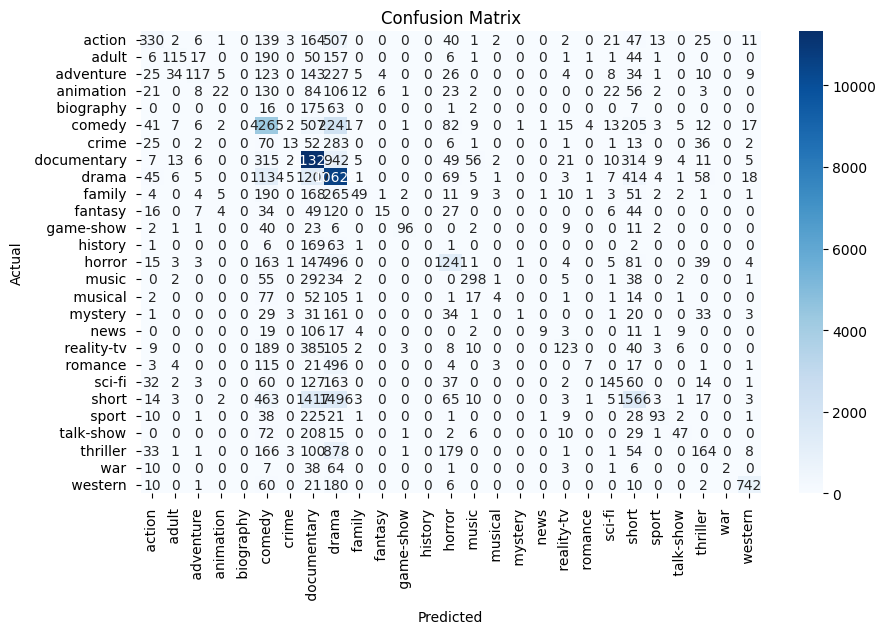

In [17]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()